In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [3]:
# Linear Regression Equation for this data
# Ground_Temperature = (m * Chirps_Second) + c

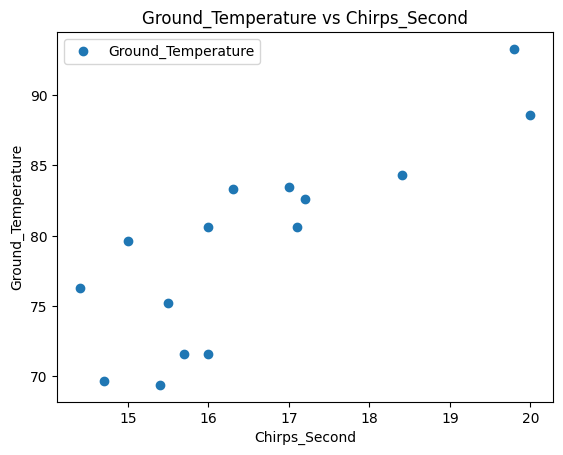

In [4]:
df.plot(x='Chirps_Second', y='Ground_Temperature', style='o')
plt.title('Ground_Temperature vs Chirps_Second')
plt.xlabel('Chirps_Second')
plt.ylabel('Ground_Temperature')
plt.show()

In [5]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


In [6]:
X = df.loc[:, ['Chirps_Second']].values
y = df.loc[:, 'Ground_Temperature'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 77)

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [8]:
# m and c values of the equation
c = regressor.intercept_
m = regressor.coef_
print(m)
print(c)

[3.2478231]
24.773397013035


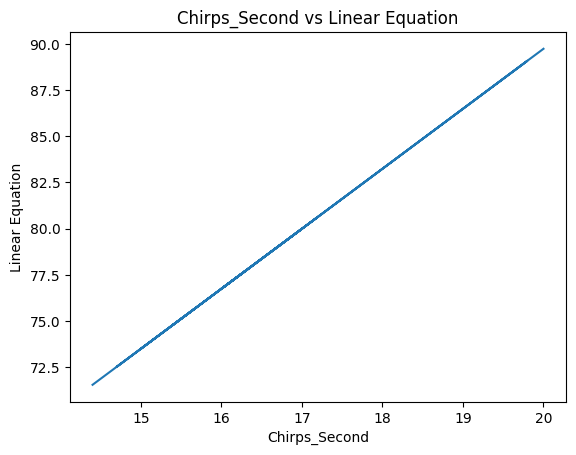

In [9]:
#Plot of the predection based on quation with respect to the original data
eq = []
iq = []
for i in df.Chirps_Second:
    eq.append(((m * i) + c))
    
eq = np.asfarray(eq)
plt.plot(df.Chirps_Second,eq)
plt.title('Chirps_Second vs Linear Equation')
plt.xlabel('Chirps_Second')
plt.ylabel('Linear Equation')
plt.show()

In [10]:
# R2 value of the quation
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R^2:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R^2: 0.7483758827327975


0.7483758827327975

In [11]:
# if the Ground Temp is 95 what is the approximate value of Chrips

# Ground_Temprature   = m * Chrips_Second + c
# 95 = 3.24 * Chrips_Seconds + 24.7

approx_chrips = (95-24.7)/3.24
print("Approx chrips at 95: ",approx_chrips )

Approx chrips at 95:  21.697530864197528


In [12]:
# Ground Temprature at 18 chrips per second 
regressor.predict([[18]])

array([83.23421289])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [13]:
df1 = pd.read_fwf("C:/Users/pjpra/ML_Lecture/brain_body.txt")

In [14]:
df1

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [15]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [16]:
iqr = df1.Brain.quantile(0.75) - df1.Brain.quantile(0.25)
upper_threshold = df1.Brain.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.Brain.quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold

(-70.80375000000001, 119.60625)

In [17]:
df1.Brain = df1.Brain.clip(0,119)
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.078694,283.134194
std,45.015189,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.000000,5712.000000


In [18]:
iqr = df1.Body.quantile(0.75) - df1.Body.quantile(0.25)
upper_threshold = df1.Body.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.Body.quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold

(-238.375, 408.625)

In [19]:
df1.Body = df1.Body.clip(0,408)
df1.describe()
df1.shape

(62, 2)

In [20]:
df1.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.078694,104.585806
std,45.015189,148.446708
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.000000,408.000000


In [21]:
df1 = df1.drop_duplicates()
df1.shape

(56, 2)

In [22]:
# Linear Regression Equation for this data
# Body_Weight = (m * Brain_Weight) + c

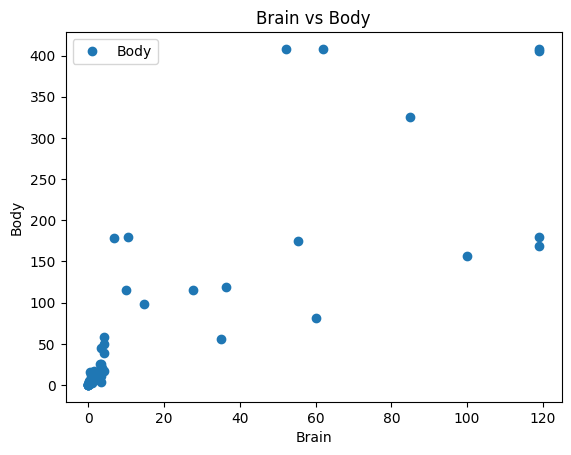

In [23]:
df1.plot(x='Brain', y='Body', style='o')
plt.title('Brain vs Body')
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

In [24]:
df1.corr()

,Brain,Body
Brain,1.000000,0.799397
Body,0.799397,1.000000


In [25]:
X = df1.loc[:, ['Brain']].values
y = df1.loc[:, 'Body'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 77)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 77)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
# m and c values of the equation
c = regressor.intercept_
m = regressor.coef_
print(m)
print(c)

[86.72408723]
67.68205128205126


In [29]:
# R2 value of the quation
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('R^2:', metrics.r2_score(y_test,y_pred))
regressor.score(X_test,y_test)

R^2: 0.6750327010966115


0.6750327010966115

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [30]:
df2 = pd.read_fwf("C:/Users/pjpra/OneDrive/Desktop/My_Learnings/Python/Task6/Ass_5,6,7,8/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [31]:
#df2.Sex.unique()
#df2.Rank.unique()
#df2.Year.values
#df2.Degree.values
#df2.YSdeg.values
#df2.Salary.values

In [32]:
df2.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [33]:
df2.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

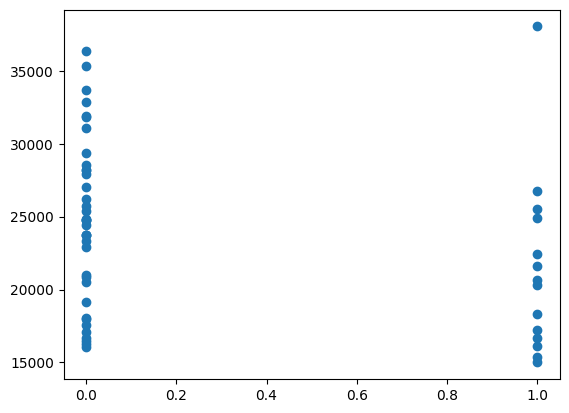

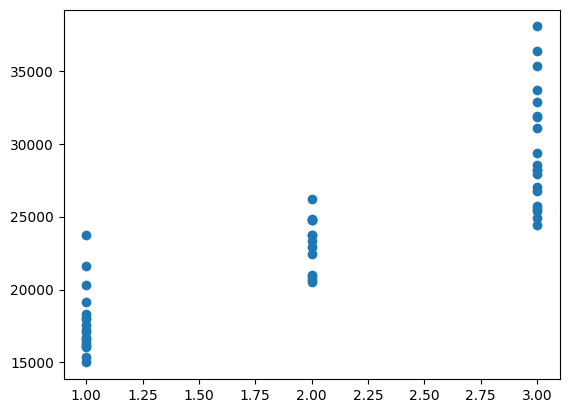

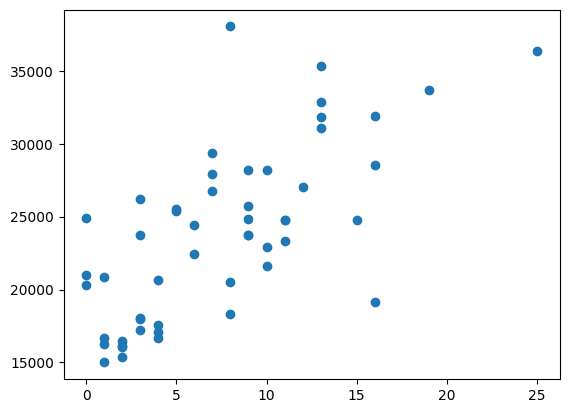

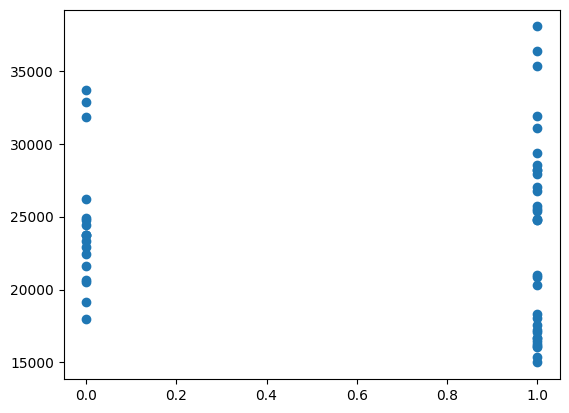

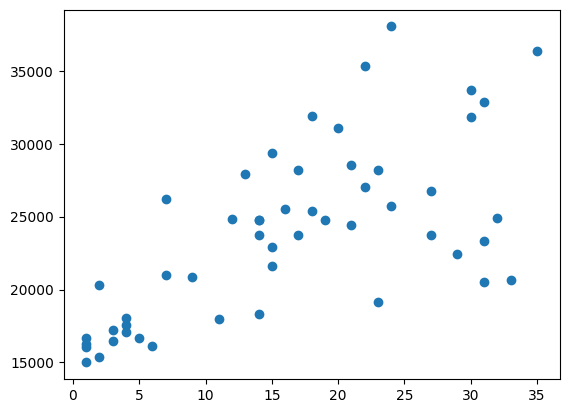

In [34]:
for i in range(5):
    plt.scatter(df2.iloc[:,i],df2.Salary)
    plt.show()

In [35]:
df2.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


In [36]:
# Select Columns for fit
features = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [37]:
# Task 1 and 2
for each in range(5):
    X = df2.iloc[:,[each]].values
    y = df2.iloc[:,5].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 77)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    regressor.fit(X_train,y_train)
    print(f'{each+1}) Feature {features[each]} and Salary,\n-Coef {regressor.coef_} \n-intercept {regressor.intercept_}')
    # R2 value of the quation
    y_pred = regressor.predict(X_test)
    from sklearn import metrics
    print('-R^2: ', metrics.r2_score(y_test,y_pred),'\n')
    regressor.score(X_test,y_test)
    

1) Feature Sex and Salary,
-Coef [-1937.69818703] 
-intercept 23936.944444444445
-R^2:  -0.1042900178704056 

2) Feature Rank and Salary,
-Coef [5449.61776] 
-intercept 23936.944444444445
-R^2:  0.7860580956161768 

3) Feature Year and Salary,
-Coef [4468.4966796] 
-intercept 23936.944444444445
-R^2:  0.460738330181391 

4) Feature Degree and Salary,
-Coef [-665.68225388] 
-intercept 23936.944444444445
-R^2:  -0.04045966267432188 

5) Feature YSdeg and Salary,
-Coef [4661.26832968] 
-intercept 23936.944444444445
-R^2:  0.04102501639953582 



In [38]:
# Choosing the columns with the R^2 above 0
X = df2.loc[:,['Rank','Year','YSdeg']].values
y = df2.loc[:,'Salary'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 77)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
regressor.fit(X_train,y_train)
print(f'Combined features (Rank, Year and YSdeg):\n- Coef {regressor.coef_} \n- intercept {regressor.intercept_}')

# R2 value of the quation
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('- R^2: ', metrics.r2_score(y_test,y_pred),'\n')

Combined features (Rank, Year and YSdeg):
- Coef [4340.00381337 2355.3990238   -97.94592049] 
- intercept 23936.944444444445
- R^2:  0.8626415728320975 



In [39]:
# The combined features Rank, Year and YSdeg produce a R^2 that is close to 0.8 making it a better model

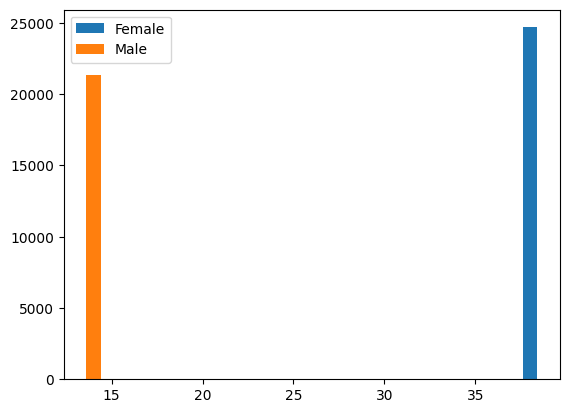

In [40]:
# Task 3
# Is sex a factor in salary
plt.bar(df2[df2['Sex'] == 0].count(),df2.Salary[df2['Sex'] == 0].mean())
plt.bar(df2[df2['Sex'] == 1].count(),df2.Salary[df2['Sex'] == 1].mean())
plt.legend(['Female','Male'])

In [41]:
# There is no clear relationship between the feature Sex and Salary